<a href="https://colab.research.google.com/github/kenji0011/CSST102-3B-AY2526/blob/main/MP2/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LOGISTIC REGRESSION**

#**1. Dataset (Breast Cancer)**

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

#**2. Data Preparation**

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#**3. Train-Test Split (80%-20%)**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**4. Train Logistic Regression Model**

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate on train and test
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

#**5. 5-Fold Cross-Validation**

In [5]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

mean_cv = cv_scores.mean()
std_cv = cv_scores.std()

# Save to cross_validation.txt later
print(f"CV Accuracy: {mean_cv:.4f} ± {std_cv:.4f}")

CV Accuracy: 0.9758 ± 0.0146


#**6. Confusion Matrix and Classification Metrics**

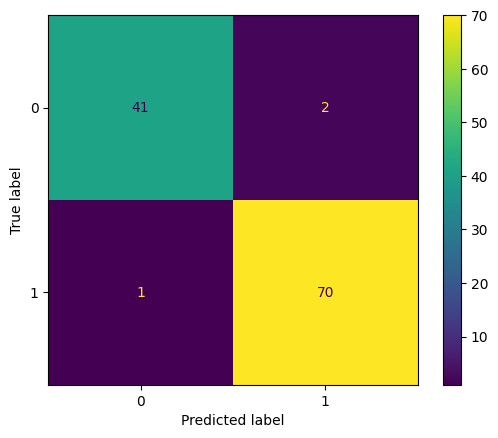

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [6]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.savefig('confusion_matrix.png')
plt.show()

# Metrics
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

The Logistic regression is well-fitted and highly effective for this binary classification task. It achieves near-perfect performance with minimal error, making it suitable for real-world deployment. Further improvements may be marginal but could involve feature engineering or hyperparameter tuning to push accuracy closer to 100%.

#**7. Learning Curve**

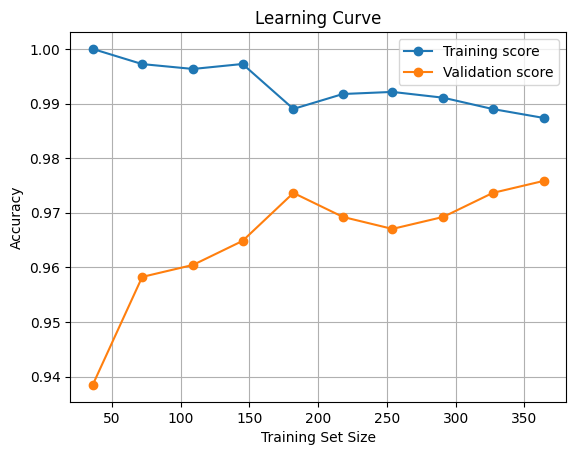

In [7]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.savefig('learning_curve.png')
plt.show()

Note: If both curves converge and are high = good fit |
Large gap = overfitting |
Both low = underfitting

This learning curve suggests that the model is experiencing moderate overfitting particularly when trained on smaller datasets. The high trainign accuracy coupled with lower validation accuracy indicates that the model is memorizing the trainign data rathher than learning generalizable patterns.